# MDL - Assignment 1
Team 95   
Mihir Bani, 2019113003  
Amul Agrawal, 2019101113

In [1]:
# importing all the imp libraries
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
import pickle
import math
%matplotlib inline

## Task 2

### Data loading and processing
Loading the data from pickle file into `train_data` and `test_data`.
The data contains numpy array of [x_i,y_i]

In [2]:
# loading from the train.pkl file
file = open('./train.pkl','rb')
train_data = pickle.load(file)
file.close()

# loading from the test.pkl file
file = open('./test.pkl','rb')
test_data = pickle.load(file)
file.close()

In [3]:
print(train_data)
print("Train data shape",train_data.shape)

[[  39.18236666 4765.40421584]
 [  -7.08833508 3782.0037892 ]
 [ -39.80170787  743.90527908]
 ...
 [  39.35145933 2470.61226356]
 [  12.8210855  1806.34100101]
 [ -28.09216372  -77.523256  ]]
Train data shape (8000, 2)


In [4]:
print(test_data)
print("Test data shape",test_data.shape)

[[-2.14700000e+01 -5.02846044e+02]
 [-3.71100000e+01 -2.58147766e+03]
 [-6.40000000e+00 -1.28624000e+01]
 [ 3.61000000e+00  3.05555205e+00]
 [ 2.57700000e+01  8.43144144e+02]
 [-3.68500000e+01 -2.52776216e+03]
 [ 4.54200000e+01  4.64430568e+03]
 [ 9.72000000e+00  4.49297344e+01]
 [ 1.21600000e+01  8.78233728e+01]
 [ 3.21500000e+01  1.64155422e+03]
 [ 3.73700000e+01  2.58208779e+03]
 [ 3.30200000e+01  1.77898237e+03]
 [ 6.13000000e+00  1.17044818e+01]
 [-8.12000000e+00 -2.70068544e+01]
 [-4.63000000e+01 -5.00405315e+03]
 [ 3.81000000e+00  3.43689505e+00]
 [-2.39000000e+00  2.27062050e-01]
 [-5.01000000e+00 -5.73947705e+00]
 [-4.98100000e+01 -6.22714303e+03]
 [-1.44000000e+00  8.23628800e-01]
 [ 1.71000000e+00  1.17442855e+00]
 [-3.26900000e+01 -1.76673153e+03]
 [ 3.87600000e+01  2.88209592e+03]
 [-6.51000000e+00 -1.35772246e+01]
 [ 4.24000000e+00  4.40929920e+00]
 [-3.82100000e+01 -2.81715582e+03]
 [ 1.05800000e+01  5.78698276e+01]
 [-2.98200000e+01 -1.34233196e+03]
 [-4.88200000e+01 -5

In [5]:
# dividing test data into test_X and test_Y
test_X = test_data[:,0]
test_Y = test_data[:,1]

In [6]:
print(test_X.shape)
print(test_Y.shape)

(80,)
(80,)


Text(0, 0.5, 'y')

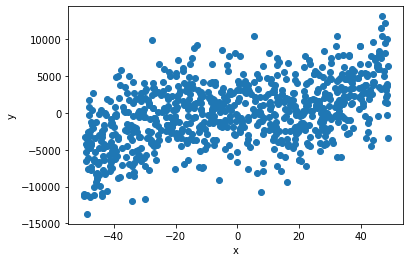

In [7]:
# scatter plot first 800 entries from the train data
plt.scatter(train_data[:800,0],train_data[:800,1])
plt.xlabel('x')
plt.ylabel('y')

In [8]:
# Shuffling the train_data
# np.random.shuffle(train_data)
# (right now we have not shuffled the data)
print(train_data)

[[  39.18236666 4765.40421584]
 [  -7.08833508 3782.0037892 ]
 [ -39.80170787  743.90527908]
 ...
 [  39.35145933 2470.61226356]
 [  12.8210855  1806.34100101]
 [ -28.09216372  -77.523256  ]]


In [9]:
# dividing into 10 training sets and storing in train_X and train_Y as numpy array
train_X = []
train_Y = []
len_train = int(train_data.shape[0]/10)
for i in range(10):
    train_X.append(train_data[i*len_train:(i+1)*len_train,0])
    train_Y.append(train_data[i*len_train:(i+1)*len_train,1]) 
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [10]:
print(train_X[0].shape)
print(train_Y[0].shape)

(800,)
(800,)


In [11]:
print(test_X.shape)
print(test_Y.shape)

(80,)
(80,)


### Training and Testing
Training the models on the training dataset. In the following cell, we train each model (i.e. polynomial of a particular degree) 20 times, once on each partition. The performance metrics of the model are computed by calculating its bias and variance on each data point (in the test set) across the 20 realizations of the model. The mean bias (or variance) of the model is then the mean of the bias (or variance) values calculated for each data point (in the test set).

The outer loop iterates over the polynomials from degree 1 to 20, and the inner loop iterates over the 10 different partitions of training set. A model is trained on one of the partitions of the training set, and then tested on the test set. The predictions of the model are then stored. After all the 10 parts are trained and tested, we take the mean of predictions and find the bias for a single test point and then take the mean over all test points, similarly variance is calculated.

This process is repeated for each of the 20 different degrees (models).

In [15]:
# to store the values across all degrees
mse = []
bias_sq = []
bias = []
variance = []
all_predictions = []

degrees = np.arange(1,21)

# loop over every polynomial from degree 1 to 20
for degree in degrees:
    # list for each degree
    predicted = []
    error = []
    
    # setting the polynomial of degree = degree
    poly = PolynomialFeatures(degree = degree)
    deg_test_X = poly.fit_transform(test_X.reshape(-1,1))
    
    # looping over all the 10 training sets, training the model and finding predictions
    for i in range(10):
        # setting the training data into polynomial type
        curr_train_X = poly.fit_transform(train_X[i].reshape(-1,1))
        
        # getting the regressor(training model)
        regressor = linear_model.LinearRegression()
        regressor.fit(curr_train_X,train_Y[i])
        
        # finding the predictions from the model
        deg_prediction = regressor.predict(deg_test_X)
        
        # storing the values
        predicted.append(deg_prediction)
        error.append(mean_squared_error(test_Y,deg_prediction))
        
                
    # calculating the required quantities
    error = np.array(error)
    predicted = np.array(predicted).T
#     print("size of predicted", predicted.shape)
    mean_pred = np.mean(predicted,1)
    
    # finding the bias of a particular test point from all models and taking the absolute value
    bias_diff = np.abs(mean_pred - test_Y)    

    # taking the mean across all test points
    mean_bias = np.mean(bias_diff)    
    
    # taking the mean of bias_sq across all test points
    mean_bias_sq = np.mean(bias_diff**2)   

    # updating the final lists    
    mse.append(np.mean(error))
    bias_sq.append(mean_bias_sq)
    bias.append(mean_bias)
#     print("size of mean",mean_pred.shape)
    variance.append(np.mean((predicted.T - mean_pred.T)**2))
    all_predictions.append(mean_pred)

In [16]:
# converting into numpy arrays
mse = np.array(mse)
bias_sq = np.array(bias_sq)
bias = np.array(bias)
variance = np.array(variance)
all_predictions = np.array(all_predictions)

# checking if the shapes are correct
print(mse.shape)
print(bias_sq.shape)
print(bias.shape)
print(variance.shape)
print(all_predictions.shape)

(20,)
(20,)
(20,)
(20,)
(20, 80)


### Tabulation

**Total Error:** calculated by taking mean over error of all test points.  
**Bias:** Bias is found for a single point, then took the mean of absolute value of the bias for all test points.  
**Bias_sq:** Bias is found for a single point, then took the mean of square of the bias for all test points.  
**Variance:** Variance is found for a single point, then took the mean of the variance for all test points.  

In [17]:
# Tabulating the required values 
table_dict = {
    'Degree': degrees,
    'Total Error': mse,
    'Bias (mean of |bias|)': bias,
    'Squared Bias (mean of bias^2)': bias_sq,
    'Variance': variance
}

print(tabulate(table_dict, headers='keys', tablefmt='psql'))

+----------+------------------+-------------------------+---------------------------------+------------+
|   Degree |      Total Error |   Bias (mean of |bias|) |   Squared Bias (mean of bias^2) |   Variance |
|----------+------------------+-------------------------+---------------------------------+------------|
|        1 |      1.02768e+06 |                819.717  |                     1.00168e+06 |    25999.1 |
|        2 | 992942           |                810.763  |                953836           |    39105.8 |
|        3 |  65629.2         |                 68.5109 |                  9533.34        |    56095.9 |
|        4 | 125496           |                 81.3397 |                 10588.3         |   114907   |
|        5 | 161386           |                 78.9584 |                  9952.45        |   151434   |
|        6 | 184226           |                 78.3648 |                  9999.2         |   174227   |
|        7 | 209276           |                 86.9159

### Plots

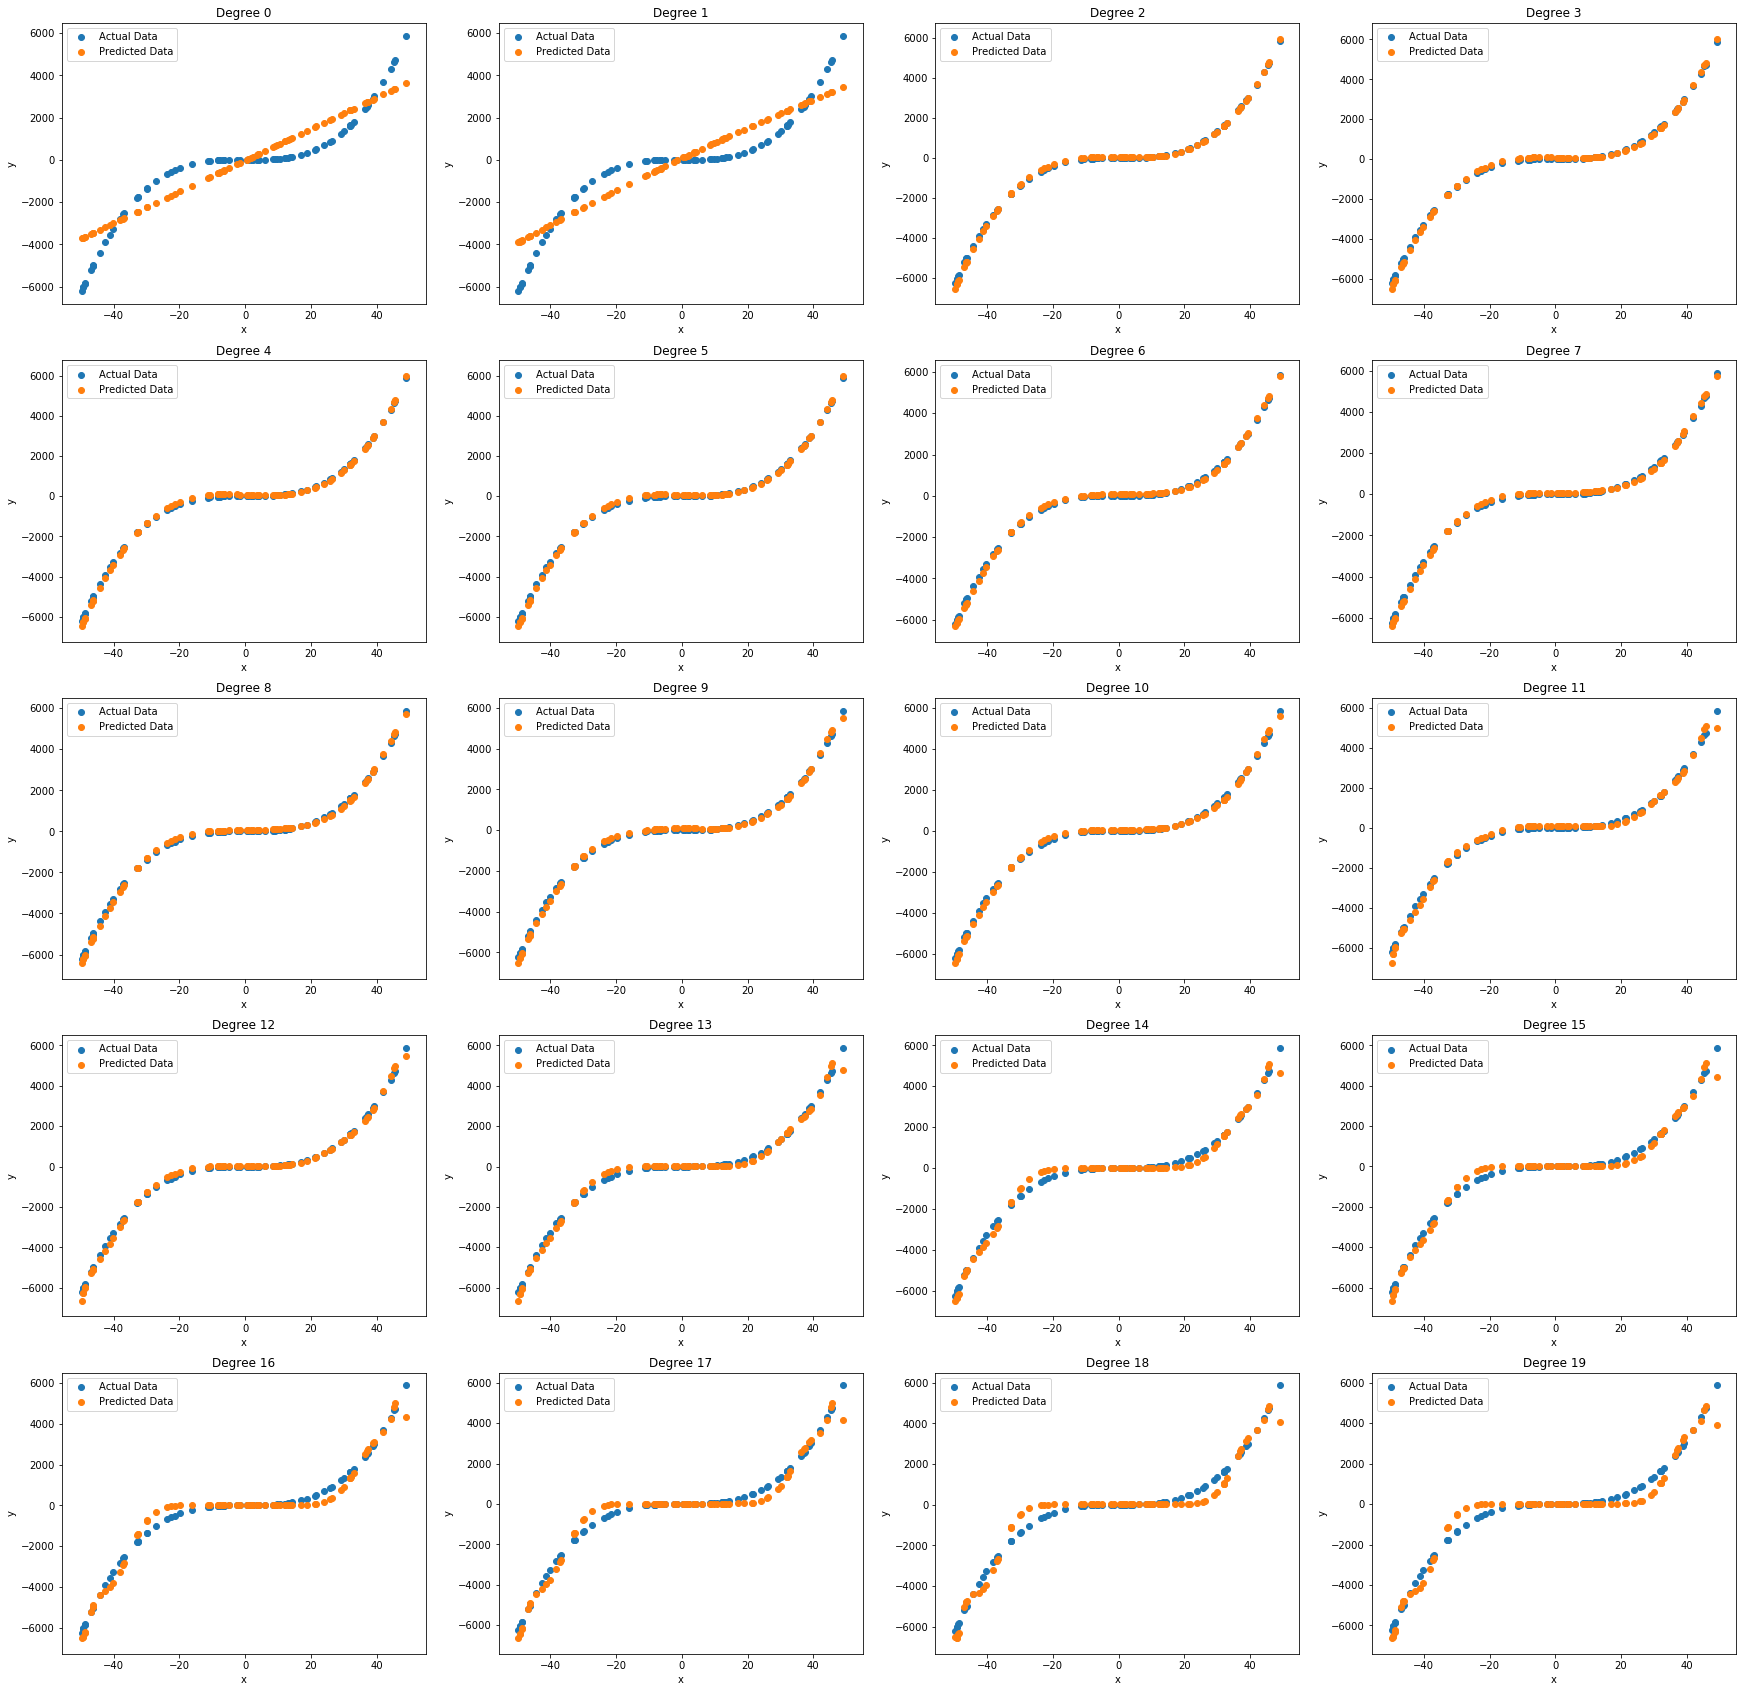

In [18]:
# plotting the average prediction and the actual value for each trained model of degree in [1,20]
fig, axs = plt.subplots(5,4,figsize=(30, 30))

for degree in range(20):    
    axs.flat[degree].scatter(test_X, test_Y, label='Actual Data')
    axs.flat[degree].scatter(test_X, all_predictions[degree], label='Predicted Data')
    axs.flat[degree].set(xlabel='x', ylabel='y')
    axs.flat[degree].set_title('Degree ' + str(degree))
    axs.flat[degree].legend()


**Observation:** We can see that the best fit is in the case of degrees ranging from 3 to 10, and then for degree greater than 10, the model again give incorrect predictions

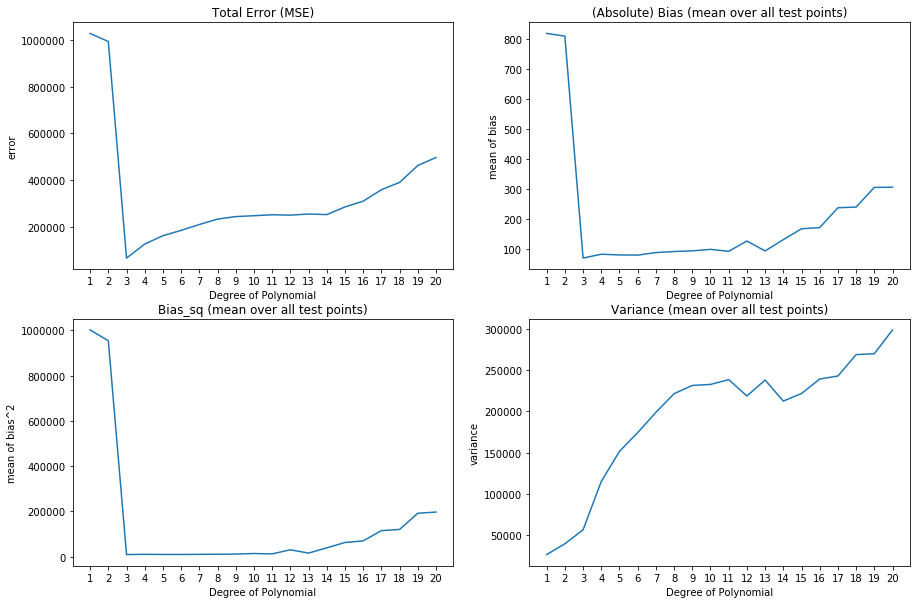

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(range(1,21),mse)
axs[0, 0].set_title("Total Error (MSE)")
axs.flat[0].set(ylabel='error')

axs[0, 1].plot(range(1,21),bias)
axs[0, 1].set_title("(Absolute) Bias (mean over all test points)")
axs.flat[1].set(ylabel='mean of bias')

axs[1, 0].plot(range(1,21),bias_sq)
axs[1, 0].set_title("Bias_sq (mean over all test points)")
axs.flat[2].set(ylabel='mean of bias^2')

axs[1, 1].plot(range(1,21),variance)
axs[1, 1].set_title("Variance (mean over all test points)")
axs.flat[3].set(ylabel='variance')

for ax in axs.flat:
    ax.set(xlabel='Degree of Polynomial')
    ax.set_xticks(range(1,21))

## Task 3

### Irreducible Error
It is the noise that is present in the data, and which can not be corrected however we train our ML model.  
It is given by the below equation, where $\sigma^2$ denotes the irreducible error

$${\displaystyle {\text{MSE}}=\operatorname {E} _{x}{\bigg \{}\operatorname {Bias} _{D}[{\hat {f}}(x;D)]^{2}+\operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}{\bigg \}}+\sigma ^{2}.}$$

$$ \sigma^2 = MSE - Bias^2 - Variance $$

We take the mean over all 10 partitions and all the test points.

In [20]:
irr_error = mse - bias_sq - variance

In [21]:
table_dict = {
    'Degree': degrees,
    'Total Error': mse,
    'Squared Bias (mean of bias^2)': bias_sq,
    'Variance': variance,
    'Irreducible Error': irr_error
}

print(tabulate(table_dict, headers='keys', tablefmt='psql'))

+----------+------------------+---------------------------------+------------+---------------------+
|   Degree |      Total Error |   Squared Bias (mean of bias^2) |   Variance |   Irreducible Error |
|----------+------------------+---------------------------------+------------+---------------------|
|        1 |      1.02768e+06 |                     1.00168e+06 |    25999.1 |         1.30967e-10 |
|        2 | 992942           |                953836           |    39105.8 |         8.73115e-11 |
|        3 |  65629.2         |                  9533.34        |    56095.9 |        -1.45519e-11 |
|        4 | 125496           |                 10588.3         |   114907   |        -1.45519e-11 |
|        5 | 161386           |                  9952.45        |   151434   |         0           |
|        6 | 184226           |                  9999.2         |   174227   |        -2.91038e-11 |
|        7 | 209276           |                 10425.8         |   198850   |         0   

Text(0, 0.5, 'Irreducible Error')

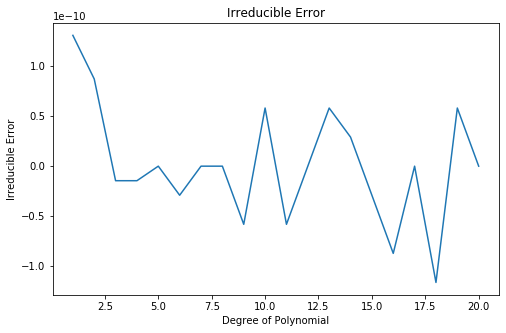

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1,21), irr_error)
plt.xlabel("Degree of Polynomial")
plt.title("Irreducible Error")
plt.ylabel("Irreducible Error")

**Note:** The value of irreducible error is very close to zero. The negative values and of the order 1e-11 come becuase of floating point precision error. So the noise is nearly zero in the dataset given.

## Task 4
### Bias Variance Tradeoff Plot

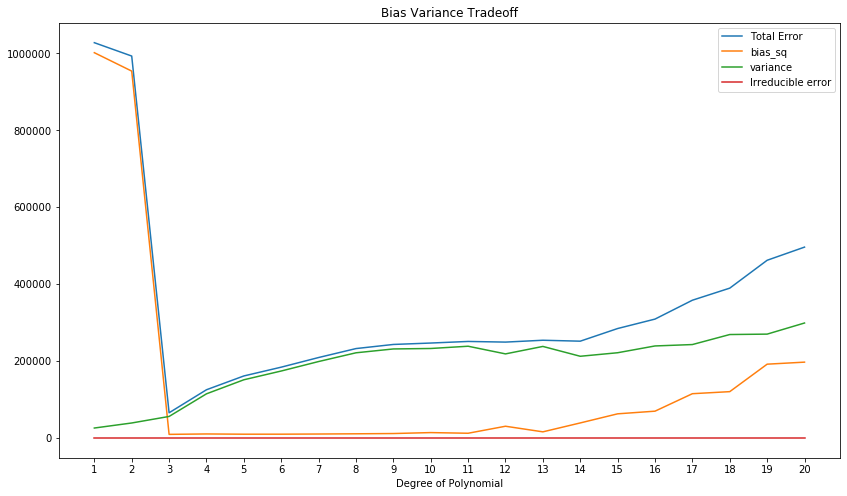

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(range(1,21),mse, label='Total Error')
plt.plot(range(1,21),bias_sq,label='bias_sq')
plt.plot(range(1,21),variance, label='variance')
plt.plot(range(1,21),irr_error, label='Irreducible error')
plt.xlabel("Degree of Polynomial")
plt.title("Bias Variance Tradeoff")
plt.xticks(range(1,21))
plt.legend()

**Analysis**
 
We can observe that the lowest Total Error happens when degree = 3.   

**Bias**   
As the degree increases, the bias first decreases and then for degree > 11, it starts to increase. It is the case because the polynomial of degrees 3 to 10 are much closer to actual test data. For greater degrees, it is an overkill for the test data and so the error increases as the model tries to capture things which are not required.  

**Variance**  
Whereas Variance is very low for lower degrees and then starts to increase with the degrees. As the degree increases the model captures the extreme points of the data, and thus the predicitons are more varied around the mean. This is the definition of variance, so the variance increases with higher complexity  


Thus there is a tradeoff between Bias and Variance